In [1]:
import pyclesperanto_prototype as cle

cle.select_device('Intel')

cle.get_device()

<Intel(R) UHD Graphics on Platform: Intel(R) OpenCL HD Graphics (1 refs)>

In [2]:
cle.set_wait_for_kernel_finish(True)

# Centroids of 2D labels

c:\users\rober\miniconda3\lib\site-packages\pyopencl\__init__.py:252: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "


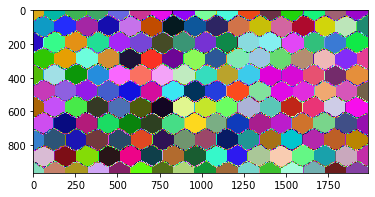

In [3]:
labels = cle.artificial_tissue_2d(width=2048, height=1024, delta_x=128, delta_y=96)
cle.imshow(labels, labels=True)

In [5]:
import time

pointlist = None
for i in range(0, 10):
    start_time = time.time()
    pointlist = cle.centroids_of_labels(labels, pointlist, use_gpu=False)
    print("CPU centroid took " + str(time.time() - start_time) + " s")

CPU centroid took 1.1562561988830566 s
CPU centroid took 0.16156959533691406 s
CPU centroid took 0.16223526000976562 s
CPU centroid took 0.15407109260559082 s
CPU centroid took 0.1644303798675537 s
CPU centroid took 0.15861201286315918 s
CPU centroid took 0.17134928703308105 s
CPU centroid took 0.15012264251708984 s
CPU centroid took 0.1633436679840088 s
CPU centroid took 0.16113853454589844 s


In [6]:
pointlist = None
for i in range(0, 10):
    start_time = time.time()
    pointlist = cle.centroids_of_labels(labels, pointlist, use_gpu=True)
    print("GPU centroid took " + str(time.time() - start_time) + " s")

GPU centroid took 0.030202388763427734 s
GPU centroid took 0.016168594360351562 s
GPU centroid took 0.014994382858276367 s
GPU centroid took 0.014958620071411133 s
GPU centroid took 0.014963150024414062 s
GPU centroid took 0.014312505722045898 s
GPU centroid took 0.013578176498413086 s
GPU centroid took 0.012742757797241211 s
GPU centroid took 0.013961553573608398 s
GPU centroid took 0.013993263244628906 s


# Centroids of 3D labels

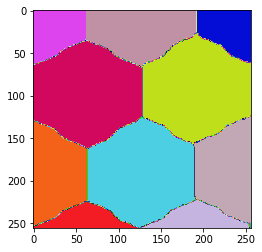

In [7]:
stack = cle.create([128, 256, 256])

for z in range(0, 128):
    cle.copy_slice(labels, stack, z)

cle.imshow(stack, labels=True)

In [8]:
import time

pointlist = None
for i in range(0, 10):
    start_time = time.time()
    pointlist = cle.centroids_of_labels(stack, pointlist, use_gpu=False)
    print("CPU centroid took " + str(time.time() - start_time) + " s")

CPU centroid took 2.216216564178467 s
CPU centroid took 1.6247587203979492 s
CPU centroid took 1.5847125053405762 s
CPU centroid took 1.5741355419158936 s
CPU centroid took 1.6029059886932373 s
CPU centroid took 1.561384916305542 s
CPU centroid took 1.599116325378418 s
CPU centroid took 1.5346126556396484 s
CPU centroid took 1.5528230667114258 s
CPU centroid took 1.526472806930542 s


In [9]:
pointlist = None
for i in range(0, 10):
    start_time = time.time()
    pointlist = cle.centroids_of_labels(stack, pointlist, use_gpu=True)
    print("GPU centroid took " + str(time.time() - start_time) + " s")

GPU centroid took 0.1368398666381836 s
GPU centroid took 0.11569046974182129 s
GPU centroid took 0.12650823593139648 s
GPU centroid took 0.11538314819335938 s
GPU centroid took 0.11362409591674805 s
GPU centroid took 0.12366700172424316 s
GPU centroid took 0.12466621398925781 s
GPU centroid took 0.11302542686462402 s
GPU centroid took 0.12337470054626465 s
GPU centroid took 0.11266732215881348 s
